In [1]:
import ares
import numpy as np
import matplotlib.pyplot as pl
import distpy

In [14]:
data = ares.analysis.GalaxyPopulation() #for lit values

#could add sources so only those used to fit are considered
def getMasses(redshifts):
    data = ares.analysis.GalaxyPopulation()

    Ms = []
    for z in redshifts:
        data_info = data.compile_data(z, quantity='smf')

        # print(data_info)

        mass = []
        for i in data_info:
    #         mass.append(data_info[i]["M"][~data_info[i]["M"].mask])
            mass.extend(data_info[i]["M"].compressed())

        Ms.extend(mass)

    Ms = list(set(Ms))
    Ms = np.sort(Ms)
    return Ms

In [4]:
# Independent variables
# redshifts = np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75])
redshifts = np.sort(np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75, 1.65, 2.5, 3.5, 0.10165, 0.25, 0.45, 0.575, 0.725, 0.9]))

# redshifts = np.array([4, 5, 6, 7, 8])

# [0.10165, 0.25, 0.35, 0.45, 0.575, 0.725, 0.9][1.65, 2.5, 3.5]
# Ms = np.logspace(7, 12, 60)
Ms = getMasses(redshifts)

# print(Ms)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('bins', Ms)]
blob_f1 = ['StellarMassFunction']

No z=0.10165 data in song2016.
No z=0.10165 data in stefanon2017.
No z=0.10165 data in duncan2014.
No z=0.10165 data in tomczak2014.
No z=0.10165 data in mortlock2011.
No z=0.10165 data in marchesini2009_10.
No z=0.10165 data in perez2008.
No z=0.25 data in song2016.
No z=0.25 data in stefanon2017.
No z=0.25 data in duncan2014.
No z=0.25 data in tomczak2014.
No z=0.25 data in mortlock2011.
No z=0.25 data in marchesini2009_10.
No z=0.25 data in perez2008.
No z=0.35 data in song2016.
No z=0.35 data in stefanon2017.
No z=0.35 data in duncan2014.
No z=0.35 data in mortlock2011.
No z=0.35 data in marchesini2009_10.
No z=0.35 data in perez2008.
No z=0.45 data in song2016.
No z=0.45 data in stefanon2017.
No z=0.45 data in duncan2014.
No z=0.45 data in tomczak2014.
No z=0.45 data in mortlock2011.
No z=0.45 data in marchesini2009_10.
No z=0.45 data in perez2008.
No z=0.575 data in song2016.
No z=0.575 data in stefanon2017.
No z=0.575 data in duncan2014.
No z=0.575 data in tomczak2014.
No z=0.57

In [15]:
blob_pars = \
{
 'blob_names': [blob_n1],
 'blob_ivars': [blob_i1],
 'blob_funcs': [blob_f1],
 'blob_kwargs': [None],
}

In [16]:
#define the parameters that remain unchanged
base_pars = ares.util.ParameterBundle('emma:model1')
base_pars.update(blob_pars)

# print(base_pars)
# This is important!
# base_pars['pop_calib_lum'] = None

In [17]:
free_pars = \
[
    'pq_func_par0[0]',
    'pq_func_par2[0]', 

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]', 
]

is_log = [False, False, False, False, False, False, False, False]

from distpy.distribution import UniformDistribution
from distpy.distribution import DistributionSet

ps = DistributionSet()
ps.add_distribution(UniformDistribution(0, 4), 'pq_func_par0[0]')
ps.add_distribution(UniformDistribution(-1, 1),  'pq_func_par2[0]')

ps.add_distribution(UniformDistribution(0.001, 2),   'pq_func_par0[1]')
ps.add_distribution(UniformDistribution(-1, 1),  'pq_func_par2[1]')

ps.add_distribution(UniformDistribution(0, .9),   'pq_func_par0[2]')
ps.add_distribution(UniformDistribution(-3, -0.01),  'pq_func_par2[2]')

ps.add_distribution(UniformDistribution(10.0, 14.0),   'pq_func_par0[3]')
ps.add_distribution(UniformDistribution(0, 2),  'pq_func_par2[3]')

In [18]:
#From Moster2010, table 7
logM_0 = 11.88 #(0.01)
mu = 0.019 #(0.002)
N_0 = 0.0282 #(0.0003)
nu = -0.72 #(0.06)
gamma_0 = 0.556 #0.001
gamma_1 = -0.26 #(0.05)
beta_0 = 1.06 #(0.06)
beta_1 = 0.17 #(0.12)

guesses = \
{
    'pq_func_par0[0]': beta_0,
    'pq_func_par2[0]': beta_1, 

    #norm
    'pq_func_par0[1]': N_0,
    'pq_func_par2[1]': nu, 

    #gamma
    'pq_func_par0[2]': gamma_0,
    'pq_func_par2[2]': gamma_1, 

    #peak mass
    'pq_func_par0[3]': logM_0,
    'pq_func_par2[3]': mu, 
}

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


C:\Users\Emma\Anaconda3\lib\site-packages\ares-0.1-py3.7.egg\ares\analysis\GalaxyPopulation.py:1259: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


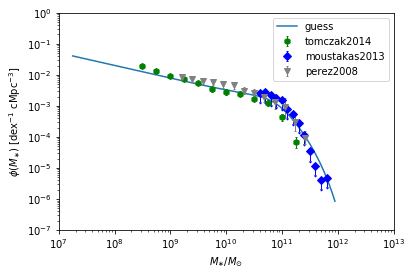

In [19]:
# base_pars
# Ms = np.logspace(7, 12, 60)

base_pars.update(guesses)
pop = ares.populations.GalaxyPopulation(**base_pars)

z = 1

smf = pop.StellarMassFunction(z, Ms)
pl.loglog(Ms, smf, label='guess')
data.PlotSMF(z=z, round_z=0.2)

pl.legend()
pl.show()

In [20]:
# Initialize a fitter object and give it the data to be fit
fitter_smf = ares.inference.FitGalaxyPopulation(**base_pars)

fitter_smf.include.append('smf')

# The data can also be provided more explicitly
#I seem to need this or else the run throws error: Must set data by hand! 
# fitter_lf.redshifts = {‘lf’: [5.9]}
fitter_smf.data = 'tomczak2014',  'mortlock2011', 'moustakas2013', 'marchesini2009_10'
#higher z
# fitter_smf.data = 'song2016', 'stefanon2017', 'duncan2014'

# print(fitter_smf.data)

In [21]:
fitter = ares.inference.ModelFit(**base_pars)
fitter.add_fitter(fitter_smf)

# Establish the object to which we'll pass parameters
from ares.populations.GalaxyHOD import GalaxyHOD
fitter.simulator = GalaxyHOD

In [22]:
# print(fitter.blob_names)
# print(fitter.blob_ivars)
# print(fitter.blob_funcs, fitter.blob_kwargs)


In [32]:
fitter.save_hmf = True  # cache HMF for a speed-up!
fitter.save_psm = True  # cache source SED model (e.g., BPASS, S99)

# Setting this flag to False will make ARES generate new files for each checkpoint.
fitter.checkpoint_append = False

fitter.parameters = free_pars
fitter.is_log = is_log
fitter.prior_set = ps

# In general, the more the merrier (~hundreds)
fitter.nwalkers = 40

# fitter.jitter = [0.001] * len(fitter.parameters)
fitter.jitter = [0.01, 0.01, 0.001, 0.005, 0.01, 0.01, 0.08, 0.01]

fitter.guesses = guesses
# fitter.debug('True')
# fitter.pops
# nwalkers

# Fixing position of walker 11 (parameter pq_func_par2[3])
# Moved from -0.0036819818545228526 to 0.026388472823550186


In [33]:
# Run the thing
fitter.run('test_smfcal_1', burn=6, steps=40, save_freq=4, clobber=True)

Saved HaloMassFunction instance to limit I/O.
# Starting burn-in: Fri Jun 26 15:22:16 2020
# Wrote test_smfcal_1.burn.dd0000.facc.pkl: Fri Jun 26 15:32:25 2020
Writing data one last time because save_freq > steps.
# Wrote test_smfcal_1.burn.dd0001.facc.pkl: Fri Jun 26 15:37:04 2020
# Burn-in complete in 888 seconds.
# Starting MCMC: Fri Jun 26 15:37:04 2020
# Wrote test_smfcal_1.dd0000.facc.pkl: Fri Jun 26 15:44:44 2020
# Wrote test_smfcal_1.dd0001.facc.pkl: Fri Jun 26 15:50:10 2020
# Wrote test_smfcal_1.dd0002.facc.pkl: Fri Jun 26 15:55:06 2020
# Wrote test_smfcal_1.dd0003.facc.pkl: Fri Jun 26 16:00:02 2020
# Wrote test_smfcal_1.dd0004.facc.pkl: Fri Jun 26 16:06:02 2020
# Wrote test_smfcal_1.dd0005.facc.pkl: Fri Jun 26 16:11:52 2020
# Wrote test_smfcal_1.dd0006.facc.pkl: Fri Jun 26 16:17:07 2020
# Wrote test_smfcal_1.dd0007.facc.pkl: Fri Jun 26 16:22:37 2020
# Wrote test_smfcal_1.dd0008.facc.pkl: Fri Jun 26 16:29:03 2020
# Wrote test_smfcal_1.dd0009.facc.pkl: Fri Jun 26 16:35:01 2020


In [34]:
anl = ares.analysis.ModelSet('test_smfcal_1')
# anl = ares.analysis.ModelSet('smf_run3')

labels = \
{
    'pq_func_par0[0]': 'beta_0',
    'pq_func_par2[0]': 'beta_1', 

    #norm
    'pq_func_par0[1]': 'N_0',
    'pq_func_par2[1]': 'nu', 

    #gamma
    'pq_func_par0[2]': 'gamma_0',
    'pq_func_par2[2]': 'gamma_1', 

    #peak mass
    'pq_func_par0[3]': 'logM_0',
    'pq_func_par2[3]': 'mu', 
}

anl.custom_labels = labels
# anl.custom_labels


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_smfcal_1                                                                          ####
#### N-d         : 8                                                                                      ####


# Loading test_smfcal_1.dd*.chain.pkl...
# Loaded test_smfcal_1.dd*.chain.pkl in 0.17 s.
# Loaded test_smfcal_1.dd0000.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0001.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0002.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0003.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0004.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0005.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0006.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0007.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0008.blob_2d.galaxy_smf.pkl
# Loaded test_smfcal_1.dd0009.blob_2d.galaxy_smf.pkl


C:\Users\Emma\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


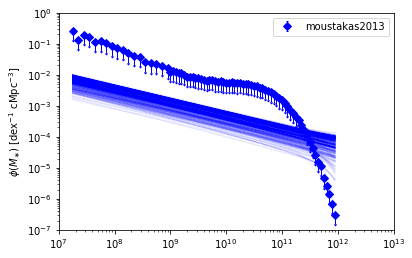

In [35]:
#look at the raw LF samples
# ax = anl.ReconstructedFunction('galaxy_lf', ivar=[6, None], samples='all', color='b', alpha=0.01)

# ax.set_yscale('log')
z = 0.
# 0.35, 0.875, 1.125, 1.75, 2.25, 2.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
gpop.PlotSMF(z, ax=ax, round_z=0.2)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

# ax = anl_2.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)
# gpop.PlotSMF(z, ax=ax, round_z=0.2)

In [36]:
params = \
['pq_func_par0[0]',
    'pq_func_par2[0]', 

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]' 
]

covar = anl.CovarianceMatrix(params)

if len(covar[0]) == 1:
    print("{}: {}".format(params[0], covar[0][0]))
else:
    for i in range(len(covar[0])):
        print("{}: {:e}".format(params[i], covar[0][i]))

pq_func_par0[0]: 1.108488e+00
pq_func_par2[0]: -2.383546e-02
pq_func_par0[1]: 1.721652e-02
pq_func_par2[1]: -7.369031e-01
pq_func_par0[2]: 6.511099e-01
pq_func_par2[2]: -3.572605e-01
pq_func_par0[3]: 1.352554e+01
pq_func_par2[3]: 2.147911e-01


0 of 1600 chain elements ignored because of chain links with inf's/nan's.


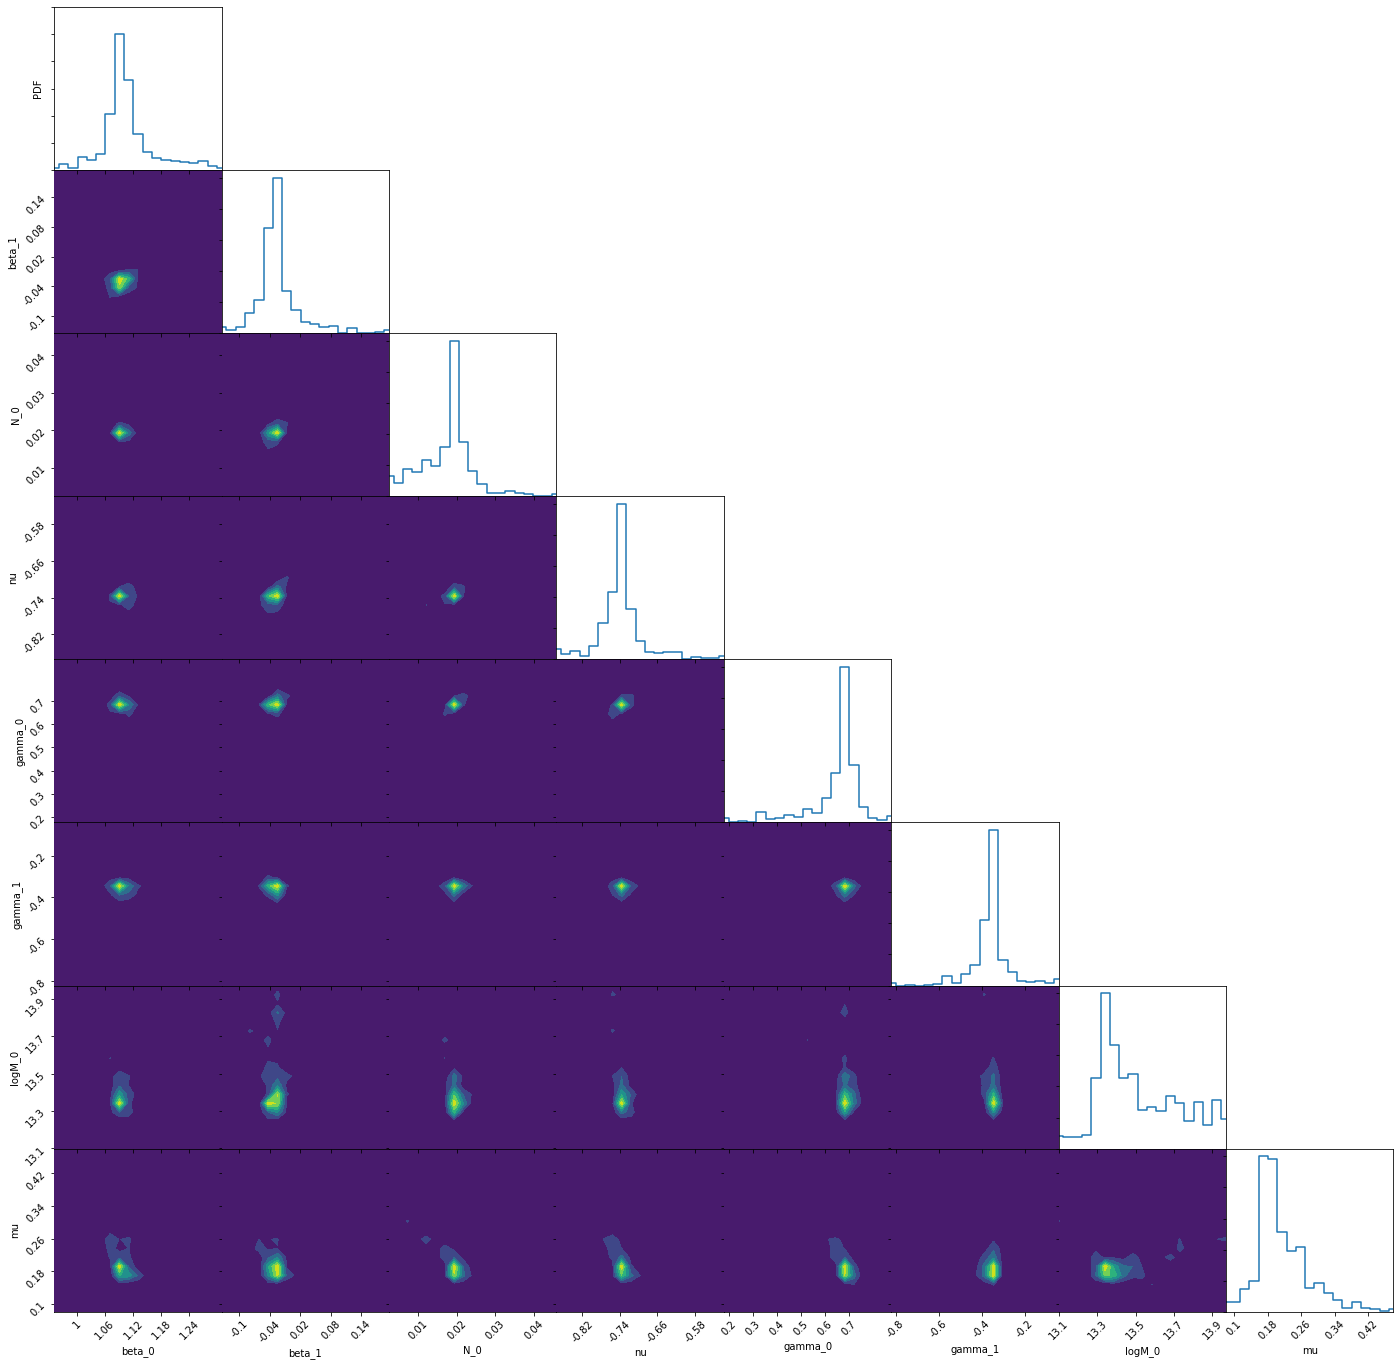

In [37]:

anl.TrianglePlot(pars=params)

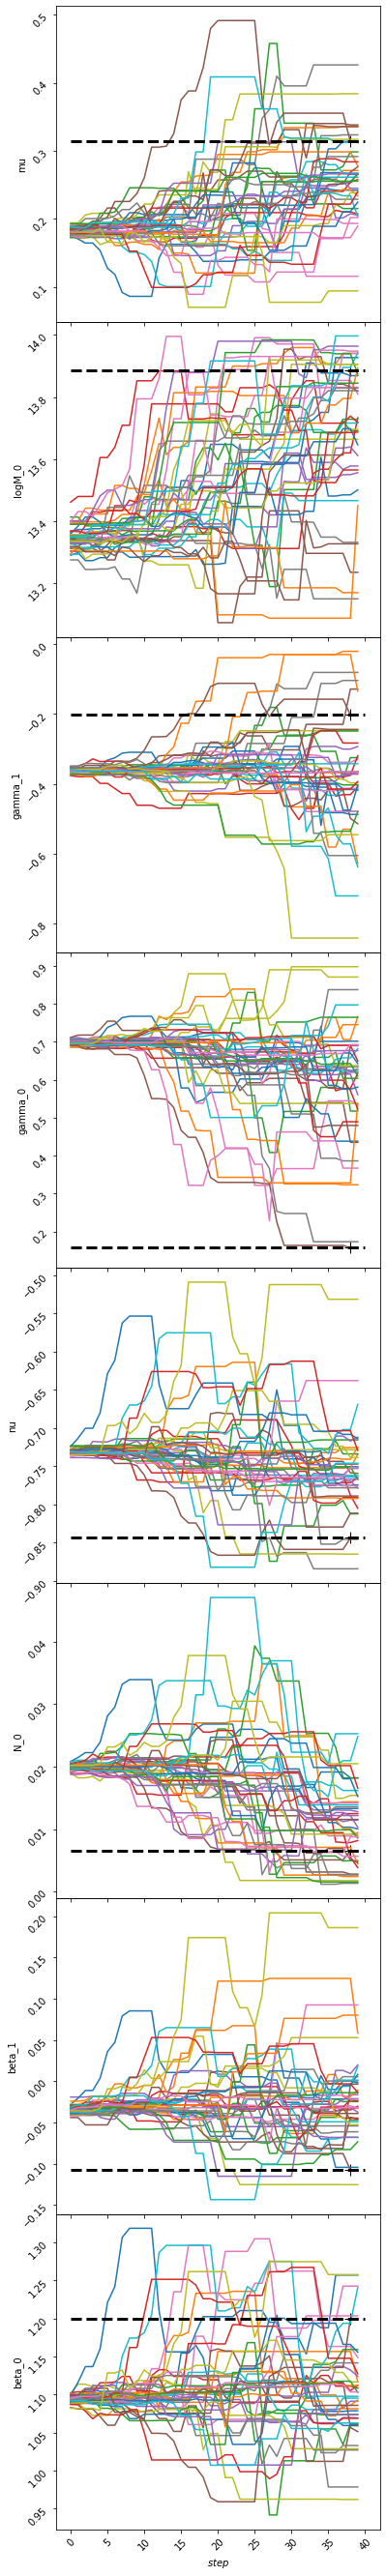

In [38]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')
# mode: 2190
# median: -3171602.2183875367

In [39]:
anl.max_likelihood_parameters()

{'pq_func_par0[0]': 1.1997302618586347,
 'pq_func_par2[0]': -0.10763227232803227,
 'pq_func_par0[1]': 0.006504506371940724,
 'pq_func_par2[1]': -0.8437767095266535,
 'pq_func_par0[2]': 0.15802673913082613,
 'pq_func_par2[2]': -0.2025504940958866,
 'pq_func_par0[3]': 13.886557646220421,
 'pq_func_par2[3]': 0.3134702248575755}

In [40]:
covar = anl.CovarianceMatrix(params)

if len(covar[0]) == 1:
    print("{}: {}".format(params[0], covar[0][0]))
else:
    for i in range(len(covar[0])):
        print("{}: {:e}".format(params[i], covar[0][i]))
        
fit_mean = np.array(covar[0])

pq_func_par0[0]: 1.108488e+00
pq_func_par2[0]: -2.383546e-02
pq_func_par0[1]: 1.721652e-02
pq_func_par2[1]: -7.369031e-01
pq_func_par0[2]: 6.511099e-01
pq_func_par2[2]: -3.572605e-01
pq_func_par0[3]: 1.352554e+01
pq_func_par2[3]: 2.147911e-01


In [41]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch)
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [42]:
fit_best_like = anl.max_likelihood_parameters()

for i in range(len(covar[0])):
    print(anl.get_1d_error(params[i])) #(maximum likelihood value, positive error, negative error).

(1.1997302618586347, array([-0.04394437,  0.13046154]))
(-0.10763227232803227, array([ 0.10781621, -0.05624984]))
(0.006504506371940724, array([ 0.01497233, -0.00326934]))
(-0.8437767095266535, array([ 0.12951439, -0.07439359]))
(0.15802673913082613, array([ 0.55198978, -0.42851686]))
(-0.2025504940958866, array([-0.11352033,  0.19756798]))
(13.886557646220421, array([-0.08162563,  0.55877663]))
(0.3134702248575755, array([-0.04529749,  0.14280606]))


In [43]:
pars_best = ares.util.ParameterBundle("emma:model1")
print(fit_best_like)

pars_best.update(fit_best_like)
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)

{'pq_func_par0[0]': 1.1997302618586347, 'pq_func_par2[0]': -0.10763227232803227, 'pq_func_par0[1]': 0.006504506371940724, 'pq_func_par2[1]': -0.8437767095266535, 'pq_func_par0[2]': 0.15802673913082613, 'pq_func_par2[2]': -0.2025504940958866, 'pq_func_par0[3]': 13.886557646220421, 'pq_func_par2[3]': 0.3134702248575755}


# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


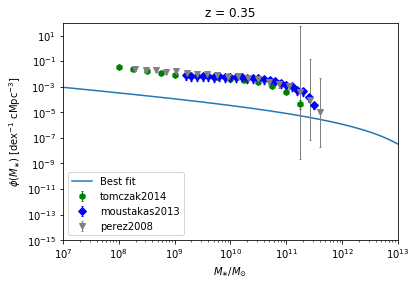

In [44]:
z = 0.35

Ms_short = np.logspace(7, 13, 80)
# Ms_short = [1e9]

# print(Ms)

ls_best = pop_best.StellarMassFunction(z, Ms_short)
# ls_best_2 = pop_best_2.StellarMassFunction(z, Ms_short)

# print(ls_best)

ls_mean = pop_mean.StellarMassFunction(z, Ms_short)

obslf = ares.analysis.GalaxyPopulation()
obslf.PlotSMF(z=z, round_z=0.2)

pl.loglog(Ms_short, ls_best, label='Best fit')
# pl.loglog(Ms_short, ls_best_2, label='Best fit 2')

# pl.loglog(Ms_short, ls_mean, label='Mean fit')
pl.title("z = %.2f" %z)
pl.legend()
pl.ylim(1e-15, 1e2)
pl.show()

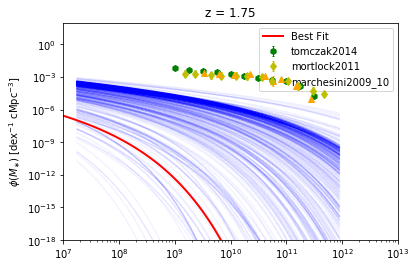

In [45]:
z = 1.75

Ms_short = np.logspace(7, 13, 80)

# print(Ms)

ls_best = pop_best.StellarMassFunction(z, Ms_short)
ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# print(ls_best)

obslf = ares.analysis.GalaxyPopulation()
obslf.PlotSMF(z=z, ax=ax, round_z=0.2)

ax.loglog(Ms_short, ls_best, label='Best Fit', color="red", linewidth=2)

pl.title("z = %.2f" %z)
pl.legend()
pl.ylim(1e-18, 1e2)
pl.show()
